In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
infile = 'data/open_nano_100.csv'
# infile = "../../../build/src/experiments/data.csv"

df = pd.read_csv(infile, sep=",")
df.columns = [col.split(':')[0] for col in df.columns]
df

,INDEX,origin_z,gt_intersect_x,gt_intersect_y,nano_intersect_x,open_intersect_x,nano_intersect_y,open_intersect_y,nano_idx_x,open_idx_x,nano_idx_y,open_idx_y,nano_value,nano_time,open_time
0,0,-50,100.000000,-50.000000,0,100.000000,0,-50,0,20.000000,0,0,0.0,0,20.000000
1,1,-49,98.429459,-49.975327,0,90.077301,0,-49,0,18.015461,0,0,0.0,0,18.015461
2,2,-48,96.860474,-49.901337,0,86.167717,0,-48,0,17.233543,0,0,0.0,0,17.233543
3,3,-47,95.294586,-49.778099,0,83.113266,0,-47,0,16.622654,0,0,0.0,0,16.622654
4,4,-46,93.733337,-49.605736,0,80.466110,0,-46,0,16.093222,0,0,0.0,0,16.093222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,45,92.178268,49.384415,0,78.308510,0,45,0,15.661702,0,0,0.0,0,15.661702
96,96,46,93.733330,49.605732,0,80.466110,0,46,0,16.093222,0,0,0.0,0,16.093222
97,97,47,95.294571,49.778099,0,83.113266,0,47,0,16.622654,0,0,0.0,0,16.622654
98,98,48,96.860466,49.901337,0,86.167717,0,48,0,17.233543,0,0,0.0,0,17.233543


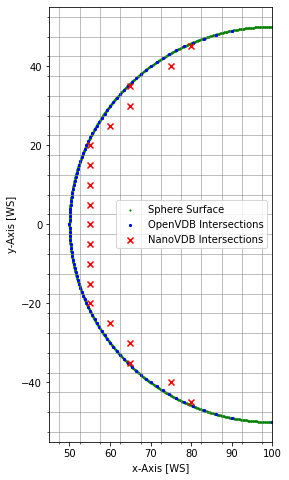

In [23]:

fig, ax = plt.subplots()
fig.set_size_inches(4, 8)

r = 50
x0 = 100
y0 = 0
t_vals = np.linspace(0.5*np.pi, 1.5*np.pi, 1000)
gt_x = x0 + r*np.cos(t_vals)
gt_y = y0 + r*np.sin(t_vals)

ax.scatter(x=gt_x, y=gt_y, s=5 , c='green', marker=".", label="Sphere Surface")
ax.scatter(x=df["open_intersect_x"], y=df["open_intersect_y"], s=5 , c='blue', label="OpenVDB Intersections", marker="x")
ax.scatter(x=df["nano_intersect_x"], y=df["nano_intersect_y"], c='red', label="NanoVDB Intersections", marker="x")
plt.legend()

voxel_size = 5
voxel_ticks = np.arange(-100 -voxel_size/2, 100 + voxel_size/2, 5)
ax.set_xticks(voxel_ticks, minor=True)
ax.set_yticks(voxel_ticks, minor=True)
ax.grid(which="minor", linestyle="-", linewidth=0.5, color="grey")

ax.set_xlim(45, 100)
ax.set_ylim(-55,55)

plt.xlabel("x-Axis [WS]")
plt.ylabel("y-Axis [WS]")

plt.savefig("../../../doc/STCE_Report/res/intersection.pdf", bbox_inches = "tight")
plt.show()

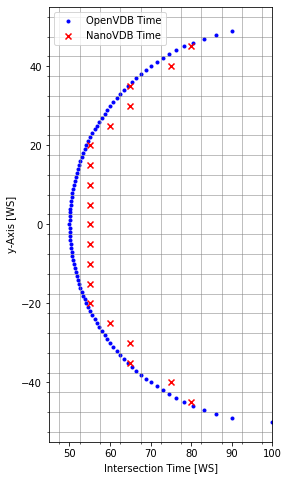

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(4,8)

voxel_size = 5
ax.scatter(x=df["open_time"]*voxel_size, y=df["open_intersect_y"], c='blue', marker=".", label="OpenVDB Time")
ax.scatter(x=df["nano_time"]*voxel_size, y=df["nano_intersect_y"], c='red', marker="x", label="NanoVDB Time")
plt.legend()


voxel_ticks = np.arange(-100 -voxel_size/2, 100 + voxel_size/2, 5)
ax.set_xticks(voxel_ticks, minor=True)
ax.set_yticks(voxel_ticks, minor=True)
ax.grid(which="minor", linestyle="-", linewidth=0.5, color="grey")

ax.set_xlim(45, 100)
ax.set_ylim(-55,55)

plt.xlabel("Intersection Time [WS]")
plt.ylabel("y-Axis [WS]")

plt.savefig("../../../doc/STCE_Report/res/intersection_time.pdf", bbox_inches = "tight")
plt.show()

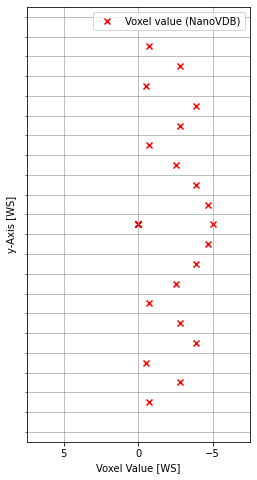

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(4,8)

voxel_size = 5
ax.scatter(x=df["nano_value"], y=df["nano_intersect_y"], c='red', label="Voxel value (NanoVDB)", marker="x")
plt.legend()


voxel_ticks = np.arange(-100 -voxel_size/2, 100 + voxel_size/2, 5)
ax.set_xticks([-5,0,5], minor=False)
ax.set_yticks(voxel_ticks, minor=True)
ax.set_yticks([], minor=False)
ax.grid(which="both", linestyle="-", linewidth=0.5, color="grey")


ax.set_xlim(voxel_size*1.5, -voxel_size*1.5)
ax.set_ylim(-55,55)

plt.xlabel("Voxel Value [WS]")
plt.ylabel("y-Axis [WS]")


plt.savefig("../../../doc/STCE_Report/res/intersection_values.pdf")
plt.show()